# 机器学习工程师纳米学位
## 深度学习
## 项目：搭建一个数字识别项目

在此文件中，我们提供给你了一个模板，以便于你根据项目的要求一步步实现要求的功能，进而完成整个项目。如果你认为需要导入另外的一些代码，请确保你正确导入了他们，并且包含在你的提交文件中。以**'练习'**开始的标题表示接下来你将开始实现你的项目。注意有一些练习是可选的，并且用**'可选'**标记出来了。

在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以'练习'开始的标题表示接下来的代码部分中有你必须要实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以'TODO'标出。请仔细阅读所有的提示！

除了实现代码外，你还必须回答一些与项目和你的实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。我们将根据你对问题的回答和撰写代码所实现的功能来对你提交的项目进行评分。

>**注意：** Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

## 连接 mnist 的字符来合成数据

你可以通过连接[MNIST](http://yann.lecun.com/exdb/mnist/)的字符来合成数据来训练这个模型。为了快速导入数据集，我们可以使用 [Keras Datasets](https://keras.io/datasets/#mnist-database-of-handwritten-digits) [中文文档](http://keras-cn.readthedocs.io/en/latest/other/datasets/#mnist)。

### 载入 mnist

In [1]:
from keras.datasets import mnist

(X_raw, y_raw), (X_raw_test, y_raw_test) = mnist.load_data()

n_train, n_test = X_raw.shape[0], X_raw_test.shape[0]

Using TensorFlow backend.


In [2]:
# 重要！ 归一化数组
X_raw = X_raw/255.
X_raw_test = X_raw_test/255.

### 可视化 mnist

我们可以通过 matplotlib 来可视化我们的原始数据集。

In [3]:
# from six.moves import cPickle

# f = open('./mnist.pkl', 'rb')
# (X_raw, y_raw), (X_raw_test, y_raw_test) = cPickle.load(f)
# n_train, n_test = X_raw.shape[0], X_raw_test.shape[0]

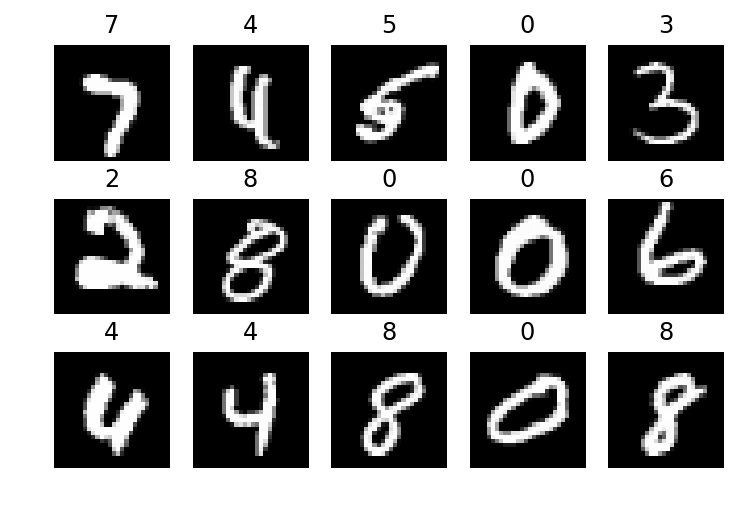

In [4]:
import matplotlib.pyplot as plt
import random

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

for i in range(15):
    plt.subplot(3, 5, i+1)
    index = random.randint(0, n_train-1)
    plt.title(str(y_raw[index]))
    plt.imshow(X_raw[index], cmap='gray')
    plt.axis('off')

### 练习：合成数据

你需要随机取随机张图片，然后将它们拼接成新的图片。

你需要设置20%的数据作为验证集，以保证模型没有过拟合。

In [5]:
print n_train, n_test
print X_raw.shape
print y_raw.shape

60000 10000
(60000, 28, 28)
(60000,)


In [36]:
import numpy as np
from sklearn.model_selection import train_test_split

n_class, n_len, width, height = 11, 5, 28, 28
random_state = 21

def generate_dataset(X, y):
    X_len = X.shape[0]    
    # n_len: how many images will be combined.
    # x_gen: X_len input images, each is [height, width*n_len, 1]
    # y_gen: n_len predictions, each is [x_len, n_class]
    #X_gen = np.zeros((X_len, height, width*n_len, 1), dtype=np.uint8)  # 我改变了数组的类型，方便保存浮点数
    #y_gen = [np.zeros((X_len, n_class), dtype=np.uint8) for i in range(n_len)]
    X_gen = np.zeros((X_len, height, width*n_len, 1), dtype=float)
    y_gen = [np.zeros((X_len, n_class), dtype=float) for i in range(n_len)]    
    # TODO: 随机取1~5个数字，并拼接成新的图片
    
    for i in range(X_len):  #产生X_len个新的合并图像
        rand_len = np.random.randint(1, 6)  # random 1-5, 随机选择5以内的长度
        for j in range(rand_len): # 随机选择一个数字加入图像中
            rand = np.random.randint(0, X_len)
            X_gen[i, 0 : height, width*j : width*(j+1)] = X[rand].reshape([height, width, 1])
            y_gen[j][i][y[rand]] = 1      # [nlen, X_len, n_class]
        if rand_len == 5:
            continue
        for j in range(rand_len, 5, 1): # 剩余图像位置的label设置为10
            y_gen[j][i][10] = 1
    return X_gen, y_gen

X_raw_train, X_raw_valid, y_raw_train, y_raw_valid = train_test_split(X_raw, y_raw, 
            test_size = 0.2, random_state = random_state)

X_train, y_train = generate_dataset(X_raw_train, y_raw_train)
X_valid, y_valid = generate_dataset(X_raw_valid, y_raw_valid)
X_test, y_test = generate_dataset(X_raw_test, y_raw_test)

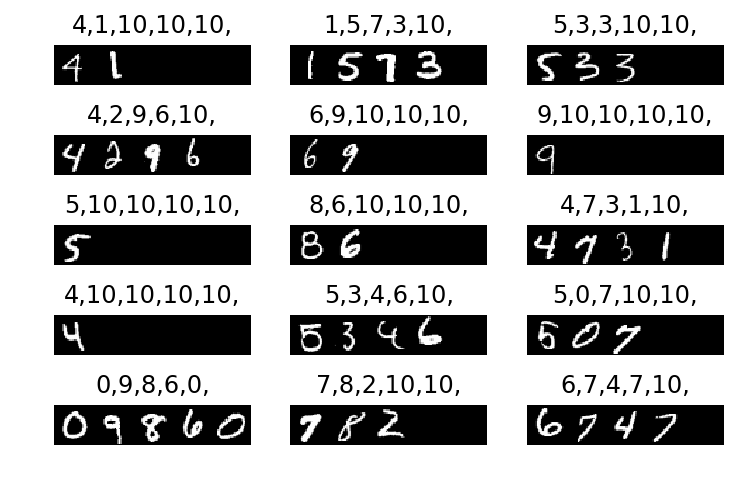

In [37]:
# 显示生成的图片
for i in range(15):
    plt.subplot(5, 3, i+1)
    index = random.randint(0, n_test-1)
    #index = random.randint(0, 1000)
    title = ''
    for j in range(n_len):
        title += str(np.argmax(y_test[j][index])) + ',' # np.argmax(取最大值的index)
    
    plt.title(title)
    plt.imshow(X_test[index][:,:,0], cmap='gray')
    plt.axis('off')

# 问题 1
_你是如何合成数据集的？，为什么要分训练集，验证集和测试集？_

**回答：**

先确定好训练集的每个图像的形状大小，每个图像包含5个28x28的图像构成。合成数据集的时候要求随机取1-5个数字。因此对每一个数据点，我随机产生一个1-5范围的数n表示这个图中包含的n个数字。然后从原始图像中随机挑选出n个数字，将训练集的前n个图像位置设置成这些随机挑选出来的图像。

训练集是用来进行模型训练的数据。

验证集是在模型训练的过程中，利用cross-valiation检查训练结果是否过拟合。如果训练模型的时候不采用验证集，可能训练的模型只针对拟合的数据有很好的效果，应用到新的在拟合过程中没有出现过的数据，拟合效果就差强人意。

测试集是在模型训练完毕后，运用到新的数据中，检查模型的好坏。



### 练习：设计并测试一个模型架构

设计并实现一个能够识别数字序列的深度学习模型。为了产生用于测试的合成数字序列，你可以进行如下的设置：比如，你可以限制一个数据序列最多五个数字，并在你的深度网络上使用五个分类器。同时，你有必要准备一个额外的“空白”的字符，以处理相对较短的数字序列。

在思考这个问题的时候有很多方面可以考虑：

- 你的模型可以基于深度神经网络或者是卷积神经网络。
- 你可以尝试是否在每个分类器间共享权值。
- 你还可以在深度神经网络中使用循环网络来替换其中的分类层，并且将数字序列里的数字一个一个地输出。

在使用 Keras 搭建模型的时候，你可以使用 [泛型模型](http://keras-cn.readthedocs.io/en/latest/models/model/) 的方式来搭建多输出模型。

In [ ]:
print len(X_train),len(X_valid), len(X_test)
print np.shape(X_train)
print np.shape(y_train)

In [49]:
from keras.models import Model
from keras.layers import *

# TODO: 构建你的模型
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
import tensorflow as tf
tf.python.control_flow_ops = tf

# This is a VGG model from:
#     http://keras-cn.readthedocs.io/en/latest/getting_started/sequential_model/

X_len = len(X_train)
#n_class, n_len, width, height = 11, 5, 28, 28

# model = Sequential()
# # input: 28x(28*5) images with 1 channels -> (x, y) tensors.
# # this applies 11 convolution filters of size 3x3 each.
# model.add(Conv2D(32, 3, 3, activation='relu', input_shape=(height, width*5, 1)))
# model.add(Conv2D(32, 3, 3, activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

# model.add(Conv2D(64, 3, 3, activation='relu'))
# model.add(Conv2D(64, 3, 3, activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(11, activation='softmax'))  # 最多五个数字组成

# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# model.compile(loss='categorical_crossentropy', optimizer=sgd)

# model.fit(X_train, y_train, batch_size=32)


## 经过修改的函数式模型
inputs = Input(shape = (28, 140, 1))

# 尝试权值初始化，默认为 kernel_initializer='random_uniform',bias_initializer='zeros')
x = Conv2D(128, (3, 3), padding='same', activation='relu', input_shape=(height, width*5, 1))(inputs)
#x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2), padding='same')(x)
x = Dropout(0.2)(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
#x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2), padding='same')(x)
x = Dropout(0.2)(x)
           
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)

outputs = [Dense(11, activation = 'softmax', name = 'x{}'.format(i))(x) for i in range(5)]

# ### naive methods
# # from https://github.com/nd009/digit_recognition/blob/master/
# # 28 * 140 * 1 -> 28 * 140 * 32
# conv1 = Conv2D(32, (3,3), padding='same', activation='relu', name='conv1')(inputs)
# # 28 * 140 * 32 -> 28 * 140 * 1024
# conv2 = Conv2D(32, (3,3), padding='same', activation='relu', name='conv2')(conv1)
# # pooling 28 * 140 * 1024 -> 14 * 70 * 1024
# pooling1 = MaxPool2D(pool_size=2, padding='valid', name='pooling')(conv2)
# # dropout 
# dropout = Dropout(0.5, name='dropout')(pooling1)
# # transform matrix to 1d list
# flatten = Flatten(name='flatten')(dropout)
# # two FCN
# fc1 = Dense(1024, activation='relu', name='fc1')(flatten)
# fc2 = Dense(1024, activation='relu', name='fc2')(fc1)
# # five classifier
# outputs = [Dense(n_class, activation='softmax', name='clf{}'.format(i))(fc2) for i in range(n_len)]

# ### deep cnn, 
# last_layer = inputs
# for layer_indx in range(5):
#     filters = 32 * (2 ** layer_indx)
#     pooling_padding = 'same' if layer_indx < 3 else 'valid'

#     conv = Conv2D(filters, (3,3), padding='same', activation='relu', name='conv{}'.format(layer_indx))(last_layer)
#     pooling = MaxPooling2D(pool_size=2, name='pooling{}'.format(layer_indx), padding=pooling_padding)(conv)

#     last_layer = pooling

# flatten = Flatten(name='flatten')(last_layer)
# fc1 = Dense(1024, activation='relu', name='fc1')(flatten)        
# dropout = Dropout(0.5, name='dropout')(fc1)
# # five classifier
# outputs = [Dense(n_class, activation='softmax', name='clf{}'.format(i))(dropout) for i in range(n_len)]


####### fit ####
#sgd = SGD(lr=0.01, decay=1e-5, momentum=0.9, nesterov=True)
model = Model(input = inputs, output = outputs)       
#model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.fit(X_train, y_train, batch_size=32)
# X = X_train[:5000]
# y = [tmp[:5000] for tmp in y_train]
# Xv = X_valid[:10000]
# yv = [tmp[:10000] for tmp in y_valid]
X = X_train
y = y_train
Xv = X_valid
yv = y_valid
model.fit(X, y, epochs=5, batch_size=128, validation_data=(Xv, yv))

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:101: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=Tensor("in...)`


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 1429s - loss: 7.6801 - x0_loss: 2.0890 - x1_loss: 1.9071 - x2_loss: 1.5757 - x3_loss: 1.2730 - x4_loss: 0.8353 - x0_acc: 0.2528 - x1_acc: 0.3244 - x2_acc: 0.4568 - x3_acc: 0.5684 - x4_acc: 0.7709 - val_loss: 5.3966 - val_x0_loss: 1.4519 - val_x1_loss: 1.2743 - val_x2_loss: 1.1820 - val_x3_loss: 0.9656 - val_x4_loss: 0.5228 - val_x0_acc: 0.6484 - val_x1_acc: 0.6383 - val_x2_acc: 0.5972 - val_x3_acc: 0.6161 - val_x4_acc: 0.8044
Epoch 2/5
48000/48000 [==============================] - 1329s - loss: 6.6304 - x0_loss: 1.7872 - x1_loss: 1.6462 - x2_loss: 1.4452 - x3_loss: 1.1166 - x4_loss: 0.6353 - x0_acc: 0.3385 - x1_acc: 0.3980 - x2_acc: 0.4898 - x3_acc: 0.6094 - x4_acc: 0.7983 - val_loss: 5.0492 - val_x0_loss: 1.2627 - val_x1_loss: 1.1891 - val_x2_loss: 1.1201 - val_x3_loss: 0.9693 - val_x4_loss: 0.5080 - val_x0_acc: 0.7106 - val_x1_acc: 0.6696 - val_x2_acc: 0.6262 - val_x3_acc: 0.62

### 问题 2
_你为解决这个问题采取了什么技术？请详细介绍你使用的技术。_

**回答：** 
在查看keras文档时，我看到了[VGG卷积神经网络](http://keras-cn.readthedocs.io/en/latest/getting_started/sequential_model/)，于是尝试用此模型进行数字识别。由于这个项目中需要预测多个数字，因此keras文档中的sequence模型不能达到这个目的。我将模型用函数式模型编写。该神经网络中主要包含下面的技术。

1.Conv2D, 卷积层
    卷积层的作用是从图像中抽取特征。因为在图像识别中较为特殊的是，单独每个像素包含的特征很少，识别图像中的物体往往需要相邻像素的联合提供的特征，卷积层正是达到这个效果。不同的卷积核可以提取图像中不同的特征。

2.MaxPooling2D，池化层
    pooling是神经网络中的一个重要技术。通过池化层的作用，可以将神经网络的大小降低，增加训练速度，防止过拟合。

3.Dropout 层
    dropout是在训练的时候随机丢弃一部分神经网络节点，这样避免了神经网络对单一节点的依赖，防止训练过程中陷入局部最小值。也防止了过拟合的发生。

4.Dense, 全连接层
    前面的多层神经网络可以看成是调整提取的过程，全连接层则起到了分类器的作用。

5.其他相关技巧，

-relu, 实际梯度下降中，sigmoid激活函数容易饱和、造成终止梯度终止。因此在前面的若干层中采用relu作为激活函数

-Flatten, 数据维度转化

-SGD，随机梯度下降，大大增加神经网络的训练速度。不过最后尝试了用‘adam’算法，发现速度没有显著区别。


### 可视化你的网络模型

参考链接：[visualization](http://keras-cn.readthedocs.io/en/latest/other/visualization/)

可以是 PNG 格式，也可以是 SVG 格式。

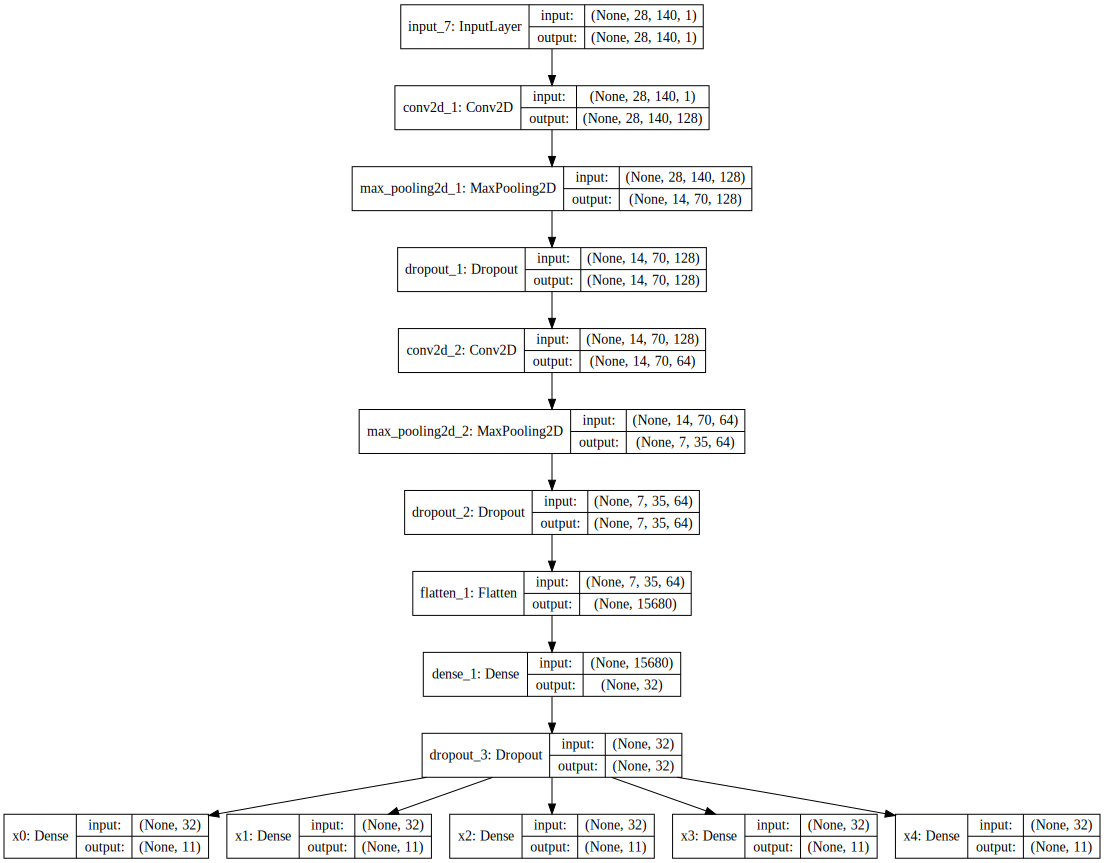

In [51]:
#from keras.utils.visualize_util import plot, model_to_dot
from keras.utils.vis_utils import model_to_dot
from IPython.display import Image, SVG

# TODO: 可视化你的模型
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

### 问题 3
_你最终的模型架构是什么样的？（什么类型的模型，层数，大小, 如何连接等）_

**回答：**

参考了keras文档中vgg模型的架构，采用了多层卷积网络叠加。具体的构造为

（1）inputlayer  28*140*1

（2）conv2d -> maxpooling -> dropout  激活函数采用relu

（3）conv2d -> maxpooling -> dropout  激活函数采用relu

（4）flatten 

（5）dense -> dropout 激活函数采用relu

（6）五个dense层分别识别五个位置的数字。激活函数采用softmax

### 练习：训练你的网络模型

训练你的模型时，需要设置训练集和验证集。

In [59]:
# TODO: 训练你的模型

# 在上面已经训练，因此这里没有重复训练
####### fit ####  
# #sgd = SGD(lr=0.01, decay=1e-5, momentum=0.9, nesterov=True)
# model = Model(input = inputs, output = outputs)       
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# X = X_train
# y = y_train
# Xv = X_valid
# yv = y_valid
# model.fit(X, y, epochs=5, batch_size=128, validation_data=(Xv, yv))

In [60]:
history = model.history
print history.history.keys()

['val_x1_acc', 'val_x2_loss', 'x0_acc', 'x0_loss', 'x2_acc', 'x2_loss', 'val_loss', 'val_x1_loss', 'x3_acc', 'val_x2_acc', 'x4_loss', 'x1_loss', 'val_x3_acc', 'val_x0_loss', 'x4_acc', 'val_x4_acc', 'val_x0_acc', 'loss', 'val_x3_loss', 'val_x4_loss', 'x3_loss', 'x1_acc']


['val_x1_acc', 'val_x2_loss', 'x0_acc', 'x0_loss', 'x2_acc', 'x2_loss', 'val_loss', 'val_x1_loss', 'x3_acc', 'val_x2_acc', 'x4_loss', 'x1_loss', 'val_x3_acc', 'val_x0_loss', 'x4_acc', 'val_x4_acc', 'val_x0_acc', 'loss', 'val_x3_loss', 'val_x4_loss', 'x3_loss', 'x1_acc']


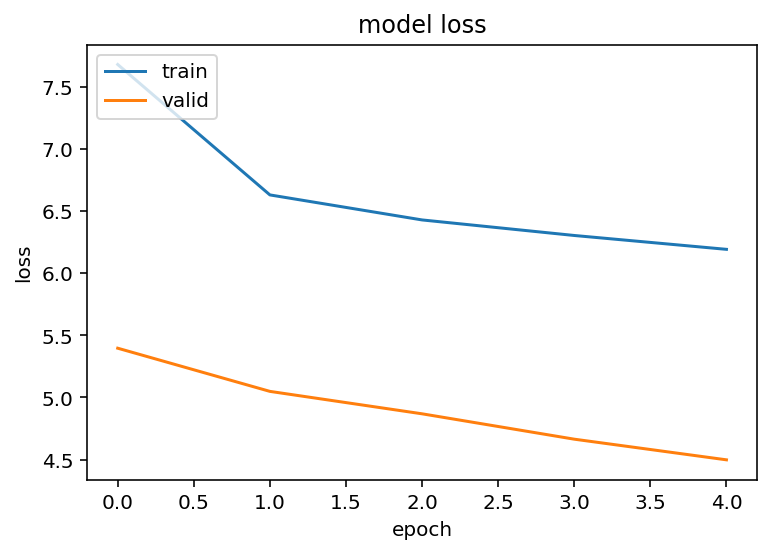

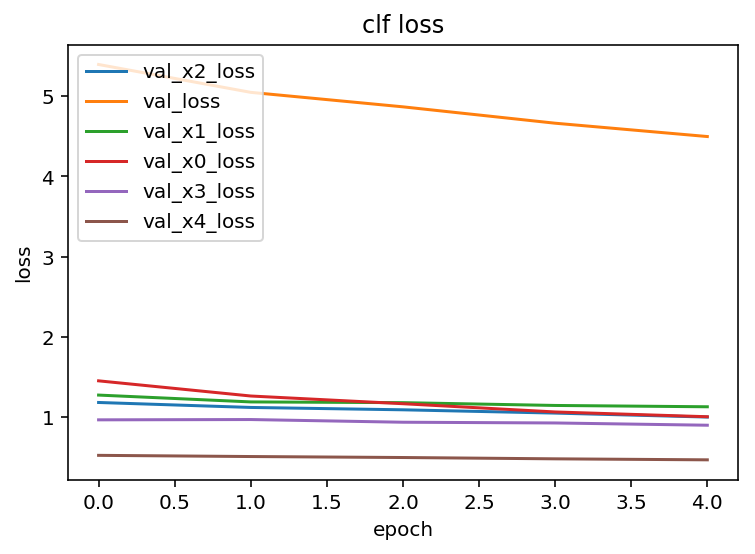

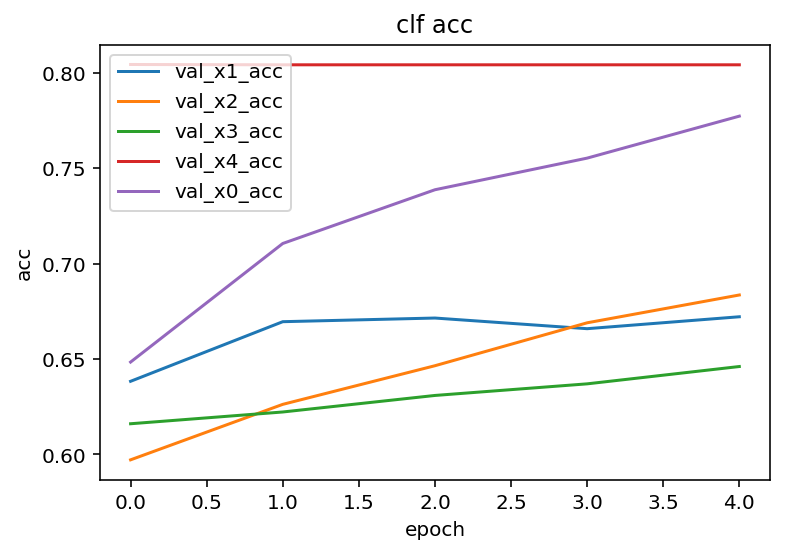

In [57]:
history = model.history
print(history.history.keys())
clf_names = [key for key in history.history.keys() if 'clf' in key or 'val' in key]
# loss related info
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'] , loc='upper left')
plt.show()

clf_loss_names = [key for key in clf_names if 'loss' in key]
clf_acc_names = [key for key in clf_names if 'acc' in key]

for loss in clf_loss_names:
    plt.plot(history.history[loss])
plt.title('clf loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(clf_loss_names , loc='upper left')
plt.show()

for acc in clf_acc_names:
    plt.plot(history.history[acc])
plt.title('clf acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(clf_acc_names , loc='upper left')
plt.show()

### 练习：计算你的模型准确率

我们刚才得到了模型每个数字的准确率，现在让我们来计算整体准确率，按照完全预测正确数字序列的标准来计算。

比如 1,2,3,10,10 预测成了 1,2,10,10,10 算错，而不是算对了80%。

In [58]:
def evaluate(model):
#     X_test = X_test
#     y_test = y_test
    # TODO: 按照错一个就算错的规则计算准确率
    predicts = model.predict(X_test)
    length = len(predicts[0])
    res = []
    for i in range(length):
        for j in range(5):
            if np.argmax(predicts[j][i]) != np.argmax(y_test[j][i]):
                res.append(0)
                break
            elif j == 4:
                res.append(1)
    return 1.*sum(res)/length

evaluate(model)

0.4334

### 问题 4

_你的模型准确率有多少？你觉得你的模型足以解决问题吗？_

**回答：**

我的模型的准确度为0.4334，对这个结果远远没有达到肉眼识别的准确度（~90%）。在Goodfellow et al. 2013文章中对门牌识别可以达到98%，因此神经网络还有很大的提升空间。这是第一个神经网络，希望能对神经网络的优化提供一些方向和建议。现在不太清楚如何显著优化结果。感觉尝试的参数和结构很多。但是每次训练都需要很长过程。

### 预测值可视化

我们将模型的预测结果和真实值画出来，观察真实效果。

(-0.5, 139.5, 27.5, -0.5)

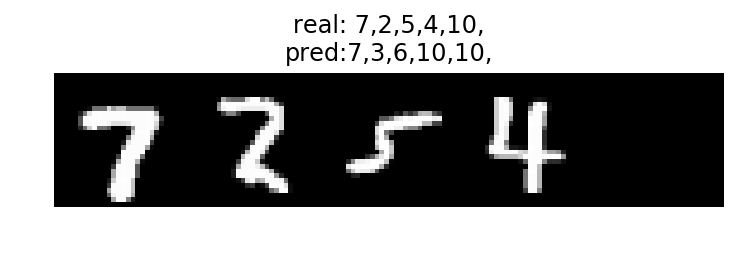

In [61]:
# n_len = 5  
# n_test = 100  # 只用100个做测试

def get_result(result):
    # 将 one_hot 编码解码
    resultstr = ''
    for i in range(n_len):
        resultstr += str(np.argmax(result[i])) + ','
    return resultstr

index = random.randint(0, n_test-1)
y_pred = model.predict(X_test[index].reshape(1, height, width*n_len, 1))

plt.title('real: %s\npred:%s'%(get_result([y_test[x][index] for x in range(n_len)]), get_result(y_pred)))
plt.imshow(X_test[index,:,:,0], cmap='gray')
plt.axis('off')

### 保存模型

模型达到满意的效果以后，我们需要将模型的权值和结构保存，以便下次调用。

In [62]:
model.save_weights('model_v1.h5')
with open('model_v1.json', 'w') as f:
    f.write(model.to_json())